### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 4
### Due: Saturday, Feb 24th at 11.59pm CST
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import corner
from scipy import optimize

## Problem 1

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_1.npy`. This is a (10 x 2) numpy array, with voltage measurements in the first column and heteroscedastic voltage uncertainties in the second column. Compute the sample mean and the standard error on the sample mean for this data.

In [3]:
# 1 Solution
data = np.load('/Users/sofimar/vu_classes/astr_8070_s24/coursework/homeworks/hw_data/hw4_data_1.npy')
V = data[:,0]
Vsig = data[:,1]

mu = np.sum(V/(Vsig**2))/np.sum(1/(Vsig**2))
sigma = np.sum(1/(Vsig**2))**(-1/2)

print('Sample Mean: ', mu)
print('Uncertainty: ', sigma)

Sample Mean:  4.942118214425304
Uncertainty:  0.43024334605205083


2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

In [4]:
# 2 Solution

def L(x, mu, sigma):
    Li = (1/(sigma*np.sqrt(2*np.pi)))*np.exp((-(x-mu)**2)/(2*sigma**2))
    lnLi = np.log(Li)
    L = np.prod(Li)
    lnL = -np.sum(np.log(Li))
    return lnL

f = lambda avg: L(x=V, mu=avg, sigma=Vsig)
fit = optimize.fmin(f, 5)

print('Best-fit Mean: ', fit)

Optimization terminated successfully.
         Current function value: 16.048013
         Iterations: 13
         Function evaluations: 26
Best-fit Mean:  [4.94213867]


3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized!

In [5]:
# 3 Solution

# Likelihood
def L2(x, mu, sigma):
    Li = (1/(sigma*np.sqrt(2*np.pi)))*np.exp((-(x-mu)**2)/(2*sigma**2))
    L = np.prod(Li)
    return L

# Prior
mumax = 7
mumin = 3
C = 1/(mumax - mumin)


# PPD
ppd = C*L2(x=V, mu=fit, sigma=Vsig)
print('PPD at best-fit mu: ', ppd)

PPD at best-fit mu:  2.6814928342098683e-08


In [6]:
xx = np.linspace(3,7,1000)
ppds = []
for i in range(1000):
    out = C*L2(V,xx[i], Vsig)
    ppds.append(out)

In [7]:
ppds = np.array(ppds)
dmu = xx[1]-xx[0]
n = 1/np.sum(ppds*dmu) # normalization constant

Text(0, 0.5, 'ppd')

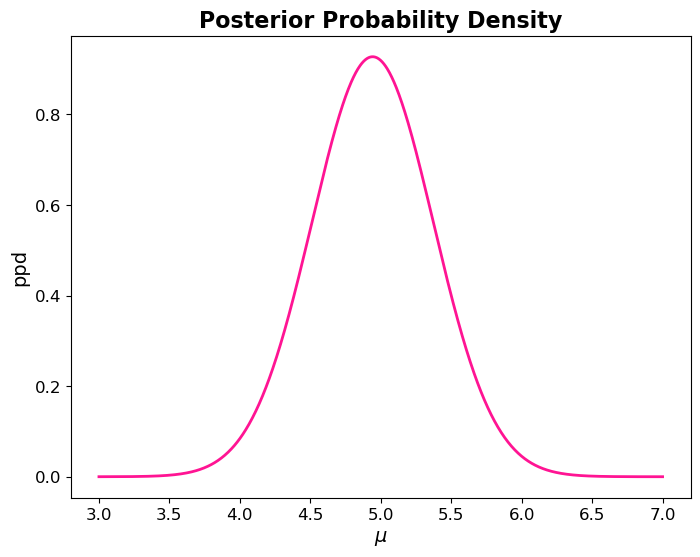

In [8]:
plt.figure(figsize=(8,6))
plt.plot(xx, ppds*n, color='deeppink', linewidth=2)
plt.title('Posterior Probability Density', fontsize=16, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('$\mu$', fontsize=14)
plt.ylabel('ppd', fontsize=14)

4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively. *Also* find the MAP value of the mean.

In [9]:
sample_sig = np.sum(1/(Vsig**2))**(-1/2)
lower_lim = (1-0.683)/2
upper_lim = 1 - lower_lim

cdf = stats.norm.cdf(xx, loc=fit, scale=sample_sig)
ind_min = np.where(cdf<=lower_lim)[0][-1]
ind_max = np.where(cdf>=upper_lim)[0][0]

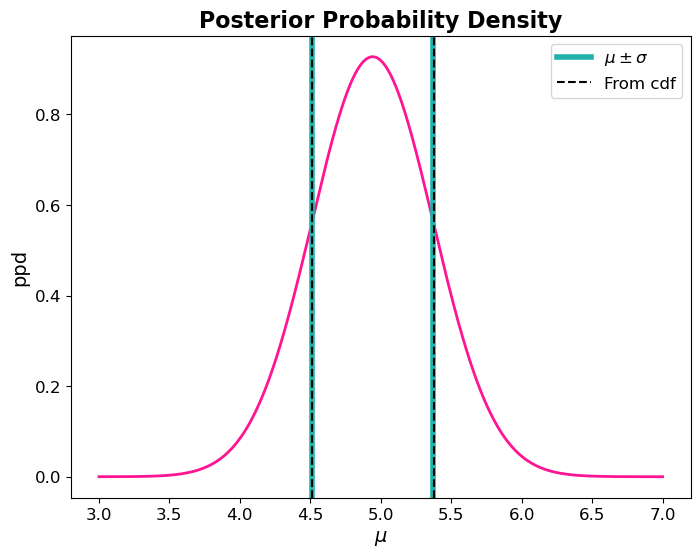

In [10]:
# 4 Solution
# 68% credible region = mu +- sigma
min68 = fit - sample_sig
max68 = fit + sample_sig

plt.figure(figsize=(8,6))
plt.plot(xx, ppds*n, color='deeppink', linewidth=2)
plt.title('Posterior Probability Density', fontsize=16, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('$\mu$', fontsize=14)
plt.ylabel('ppd', fontsize=14)
plt.axvline(min68,  color='lightseagreen', linewidth=4,  label='$\mu \pm \sigma$')
plt.axvline(max68,  color='lightseagreen', linewidth=4)
plt.axvline(xx[ind_min], ls='--',  color='black', label='From cdf')
plt.axvline(xx[ind_max], ls='--',  color='black')
plt.legend(fontsize=12)

In [11]:
print('68.3 percent region from cdf: ', xx[ind_min], xx[ind_max])
print('mu + sigma: ', min68, max68)

68.3 percent region from cdf:  4.50950950950951 5.374374374374375
mu + sigma:  [4.51189533] [5.37238202]


In [12]:
map1 = xx[np.where(ppds==np.max(ppds))]
print('MAP = ', map1)

MAP =  [4.94194194]


5) Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.6 to 5.4. 

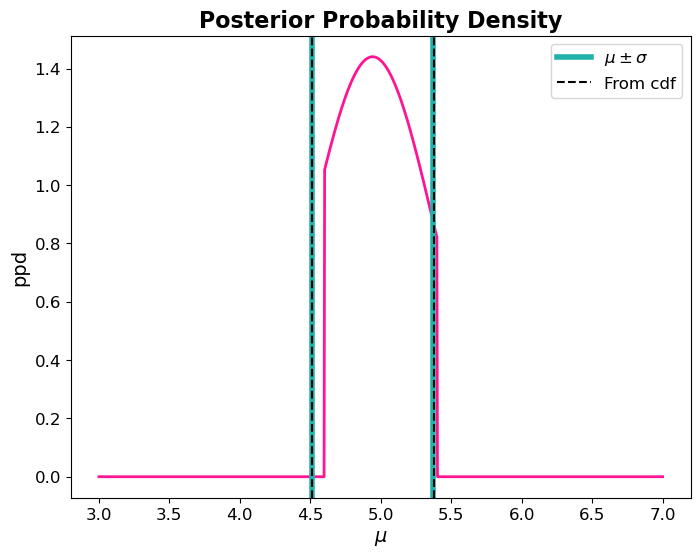

In [13]:
# 5 Solution
mumax2 = 5.4
mumin2 = 4.6
C2 = 1/(mumax2 - mumin2)
# ppd2 = C2*L2(x=V, mu=fit, sigma=Vsig)
# print('PPD at best-fit mu: ', ppd)
# xx2 = np.linspace(3,7,1000)
ppds2 = []
for i in range(1000):
    if xx[i] < 4.6 or xx[i] > 5.4:
        ppds2.append(0)
    else:
        out = C2*L2(V,xx[i], Vsig)
        ppds2.append(out)

ppds2 = np.array(ppds2)
n2 = 1/np.sum(ppds2*dmu)

cdf2 = stats.norm.cdf(xx, loc=fit, scale=sample_sig)

ind_min2 = np.where(cdf2<=lower_lim)[0][-1]
ind_max2 = np.where(cdf2>=upper_lim)[0][0]

plt.figure(figsize=(8,6))
plt.plot(xx, ppds2*n2, color='deeppink', linewidth=2)
plt.title('Posterior Probability Density', fontsize=16, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('$\mu$', fontsize=14)
plt.ylabel('ppd', fontsize=14)
plt.axvline(min68,  color='lightseagreen', linewidth=4,  label='$\mu \pm \sigma$')
plt.axvline(max68,  color='lightseagreen', linewidth=4)
plt.axvline(xx[ind_min2], ls='--',  color='black', label='From cdf')
plt.axvline(xx[ind_max2], ls='--',  color='black')
plt.legend(fontsize=12)

In [14]:
map2 = xx[np.where(ppds2==np.max(ppds2))]
print('MAP = ', map2)

MAP =  [4.94194194]


6) Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they found that the mean was actually $6\pm0.3$. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at $6$ with standard deviation of $0.3$.

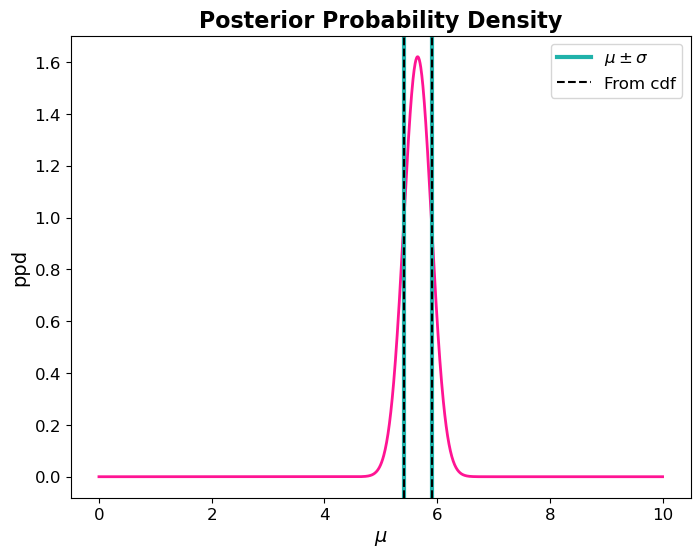

In [16]:
# 6 Solution
xx_ = np.linspace(0,10, 1600)
mu_p = 6
sig_p = 0.3
mu_0 = ((mu_p/sig_p**2)+(mu/sigma**2))/((1/sig_p**2)+(1/sigma**2))
sig_0 = ((1/sig_p**2)+(1/sigma**2))**(-1/2)

post = stats.norm.pdf(xx_, loc=mu_0, scale=sig_0)
cdf_ = stats.norm.cdf(xx_, loc=mu_0, scale=sig_0)
ind_min_ = np.where(cdf_<=lower_lim)[0][-1]
ind_max_ = np.where(cdf_>=upper_lim)[0][0]
min68_ = mu_0 - sig_0
max68_ = mu_0 + sig_0


plt.figure(figsize=(8,6))
plt.plot(xx_, post, color='deeppink', linewidth=2)
plt.title('Posterior Probability Density', fontsize=16, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('$\mu$', fontsize=14)
plt.ylabel('ppd', fontsize=14)
plt.axvline(min68_,  color='lightseagreen', linewidth=3,  label='$\mu \pm \sigma$')
plt.axvline(max68_,  color='lightseagreen', linewidth=3)
plt.axvline(xx_[ind_min_], ls='--',  color='black', label='From cdf')
plt.axvline(xx_[ind_max_], ls='--',  color='black')
plt.legend(fontsize=12)

In [17]:
map_ = xx_[np.where(post==np.max(post))]
print('MAP = ', map_)

MAP =  [5.65353346]


7) Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) on the same plot, making sure that the xlim of the plot spans 0 to 10.

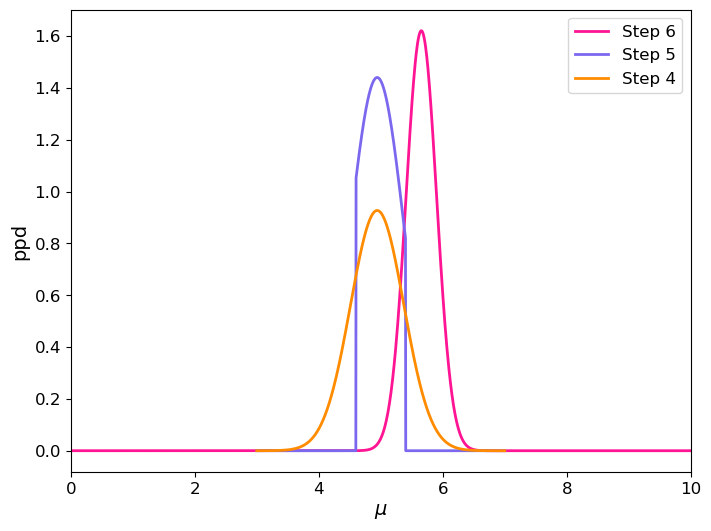

In [18]:
# 7 Solution
plt.figure(figsize=(8,6))
plt.plot(xx_, post, color='deeppink', linewidth=2, label='Step 6')
plt.plot(xx, ppds2*n2, color='mediumslateblue', linewidth=2, label='Step 5')
plt.plot(xx, ppds*n, color='darkorange', linewidth=2, label='Step 4')
plt.xlim(0,10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('$\mu$', fontsize=14)
plt.ylabel('ppd', fontsize=14)
plt.legend(fontsize=12)

8) You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly?

**Sofi's Thought Process:**

- The prior is a delta function because it is zero outside of the mu range it applies to. So delta(prior) = 1 when 3 $\leq \mu \leq$ 7

- So Evidence = sum of the L function * delta(prior) since integral = sum of function*delta

- So I am essentially summing over the L's that are within 3 $\leq \mu \leq$ 7

In [107]:
# 8 Solution
e = np.sum(ppds2)
print('Evidence: ', e)

Evidence:  2.3242528847435996e-05


This is essentially how I normalized the pdf in the steps before (i.e, divided by that number) except that I also multiplied the L function by a dm which was the step size of my linear coefficient array. Not sure which one is "correct" though.

Wait, I was supposed to find the evidence for 1) not 3) oops! The stimulant shortage is hitting HARD :( Big Pharma has been getting in the way of girlbossing lately and I'm not thrilled about it. Anyway, let's do this again:

- Ok so since this is literally just one value, instead of a sum I just have to find the L at the best-fit mean

In [108]:
e_again = L2(x=V, mu=mu, sigma=Vsig)
print('Evidence: ', e_again)

Evidence:  1.0725971348964464e-07


In [109]:
Z = e_again/e

In [110]:
Z

0.004614803930918947

The strength of the evidence is negative, which doesn't seem right since that is saying that using a "wider" prior is better than just finding the likelihood at the mean...

## Problem 2

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_2.npy`, which is a (3 x 20) numpy array that you used in `Lecture_9`. Set `x, y, sigma_y = data`. 

We're going to do some polynomial fits to this data just like in `Lecture 9`. However, in all cases you should **keep the $y$-intercept fixed at $-0.23$**. 

In [20]:
data2 = np.load('/Users/sofimar/vu_classes/astr_8070_s24/coursework/homeworks/hw_data/hw4_data_2.npy')

In [21]:
x = data2[0]
y = data2[1]
sig_y = data[2]

2) Use the following code to compute the un-normalized posterior pdf (i.e. just the likelihood x prior) on a grid of the linear coefficient (i.e. the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100.

In [22]:
#Functions to do a polynomial fit, and compute the likelihood
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

In [23]:
m = np.linspace(0.5,1.5,100)
prior = 1

logLs = np.zeros(100)
for i in range(100):
    logLs[i] = logL([-0.23,m[i]], data=data2)

Text(0, 0.5, 'Posterior pdf')

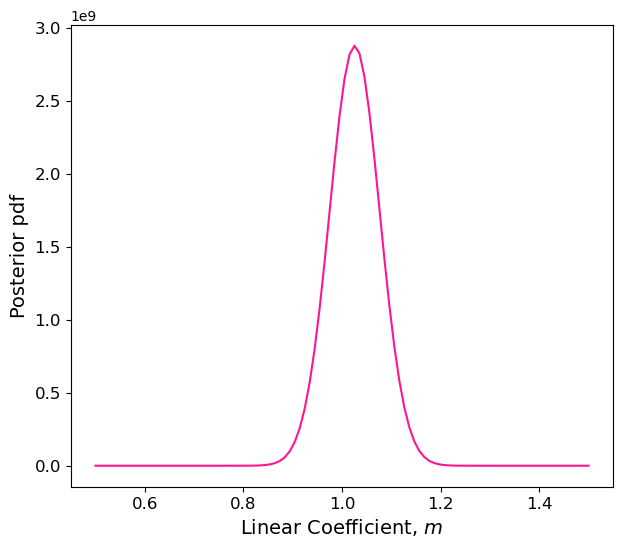

In [24]:
plt.figure(figsize=(7,6))
plt.plot(m, np.exp(logLs)*prior, color='deeppink')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Linear Coefficient, $m$', fontsize=14)
plt.ylabel('Posterior pdf', fontsize=14)

3) Using your 1D gridded likelihood-x-prior, compute the Bayesian evidence of this linear model. This may be a big number!

In [25]:
dtheta = m[1]-m[0]
evidence = np.sum((np.exp(logLs)*prior)*dtheta)
print('Bayesian Evidence: ', evidence)

Bayesian Evidence:  365684733.1606578


4) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this two-dimensional posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100 in each model dimension.

In [61]:
prior2 = 1/(0.25+1)
c2 = np.linspace(-1,0.25,100)
logL_2d = np.empty((100,100))
for i in range(100):
    for j in range(100):
        logL_2d[i,j] = logL([-0.23,m[i], c2[j]], data=data2)

In [89]:
L2d = np.exp(logL_2d)
ppd2d = prior2*L2d

In [63]:
import colorcet as cc
from matplotlib.cm import get_cmap

In [73]:
bmw = get_cmap('cet_bmw')

/var/folders/41/bw8lksgn1qnf46x_jj7ryc4r0000gn/T/ipykernel_17005/2203658896.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bmw = get_cmap('cet_bmw')


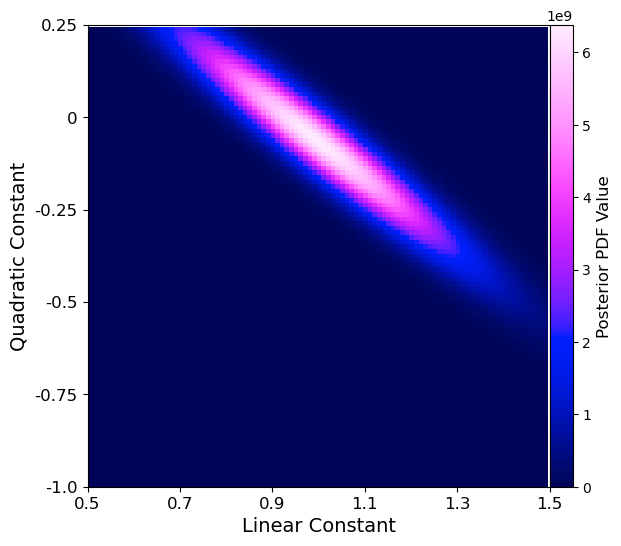

In [90]:
plt.figure(figsize=(9,6))
plt.imshow(ppd2d, cmap=bmw)
cb = plt.colorbar(pad=0)
plt.ylim(0,100)
plt.xlim(0,100)
plt.xticks(ticks=[0,20,40,60,80,100], labels=['0.5','0.7', '0.9', '1.1', '1.3', '1.5'], fontsize=12)
plt.yticks(ticks=[0,20,40,60,80,100], labels=['-1.0', '-0.75', '-0.5', '-0.25', '0', '0.25'], fontsize=12)
plt.xlabel('Linear Constant', fontsize=14)
plt.ylabel('Quadratic Constant', fontsize=14)
cb.set_label('Posterior PDF Value', fontsize=12)

5) Using your 2D gridded likelihood-x-prior, compute the Bayesian evidence of the quadratic model. 

In [91]:
# I am setting dtheta = (linear_c[1]-linear_c[0])*(quadratic_c[1]-quadratic_c[0]) aka dlinear*dquadratic 
# Since I am assuming theta is equivalent to all my parameters, which in this case there are two
# I don't know if this is correct, but that is my thought process

dt = dtheta*(c2[1]-c2[0])
e2 = np.sum(ppd2d*prior2*dt)
print('Bayesian Evidence: ', e2)


Bayesian Evidence:  394448801.3256454


6) Calculate the Bayes factor for a linear versus quadratic model. How does this compare/contrast with the BIC model comparison in the lecture? 

In [113]:
e2/evidence

1.0786581050742157

Both models are equally likely-ish since their ratio is close to 1.

In [114]:
quad_BIC = 18.45
lin_BIC = 17.31
print(quad_BIC/lin_BIC)

1.0658578856152514


Oh that's neat! The BIC ratio and the odds ratio are almost the same